In [1]:
# read input.txt
with open('input.txt', 'r') as file:
    data = file.read().strip()

# parse the input
lines = data.split('\n')

# parse the lines into a list of tuples
pairs = [tuple(line.split('-')) for line in lines]

In [2]:
edge_map = {}

for pair in pairs:
    edge_map[pair[0]] = edge_map.get(pair[0], []) + [pair[1]]
    edge_map[pair[1]] = edge_map.get(pair[1], []) + [pair[0]]

In [3]:
def find_triples_part1():
    triples = set()
    for node1, pairs in edge_map.items():
        for node2 in pairs:
            for node3 in edge_map[node2]:
                if node3 in edge_map[node1] and node1 != node3:
                    if any(term.startswith('t') for term in [node1, node2, node3]):
                        triples.add(tuple(sorted([node1, node2, node3])))

    return triples

In [4]:
print(len(find_triples_part1()))

1323


# Part 2

In [5]:
# greedy approach
def grow_clique(cliques):
    new_cliques = set()
    for clique in cliques:
        new_clique = list(clique)
        for node in clique:
            for neighbor in edge_map[node]:
                if neighbor not in new_clique and all(neighbor in edge_map[n] for n in new_clique):
                    new_clique.append(neighbor)

        new_cliques.add(tuple(sorted(new_clique)))

    return new_cliques

In [6]:
cliques = set([tuple([e]) for e in edge_map.keys()])
cliques = grow_clique(cliques)

# find the largest clique
largest_clique = max(cliques, key=len)

print(len(largest_clique))
",".join(sorted(largest_clique))

13


'er,fh,fi,ir,kk,lo,lp,qi,ti,vb,xf,ys,yu'

# Still got some time...

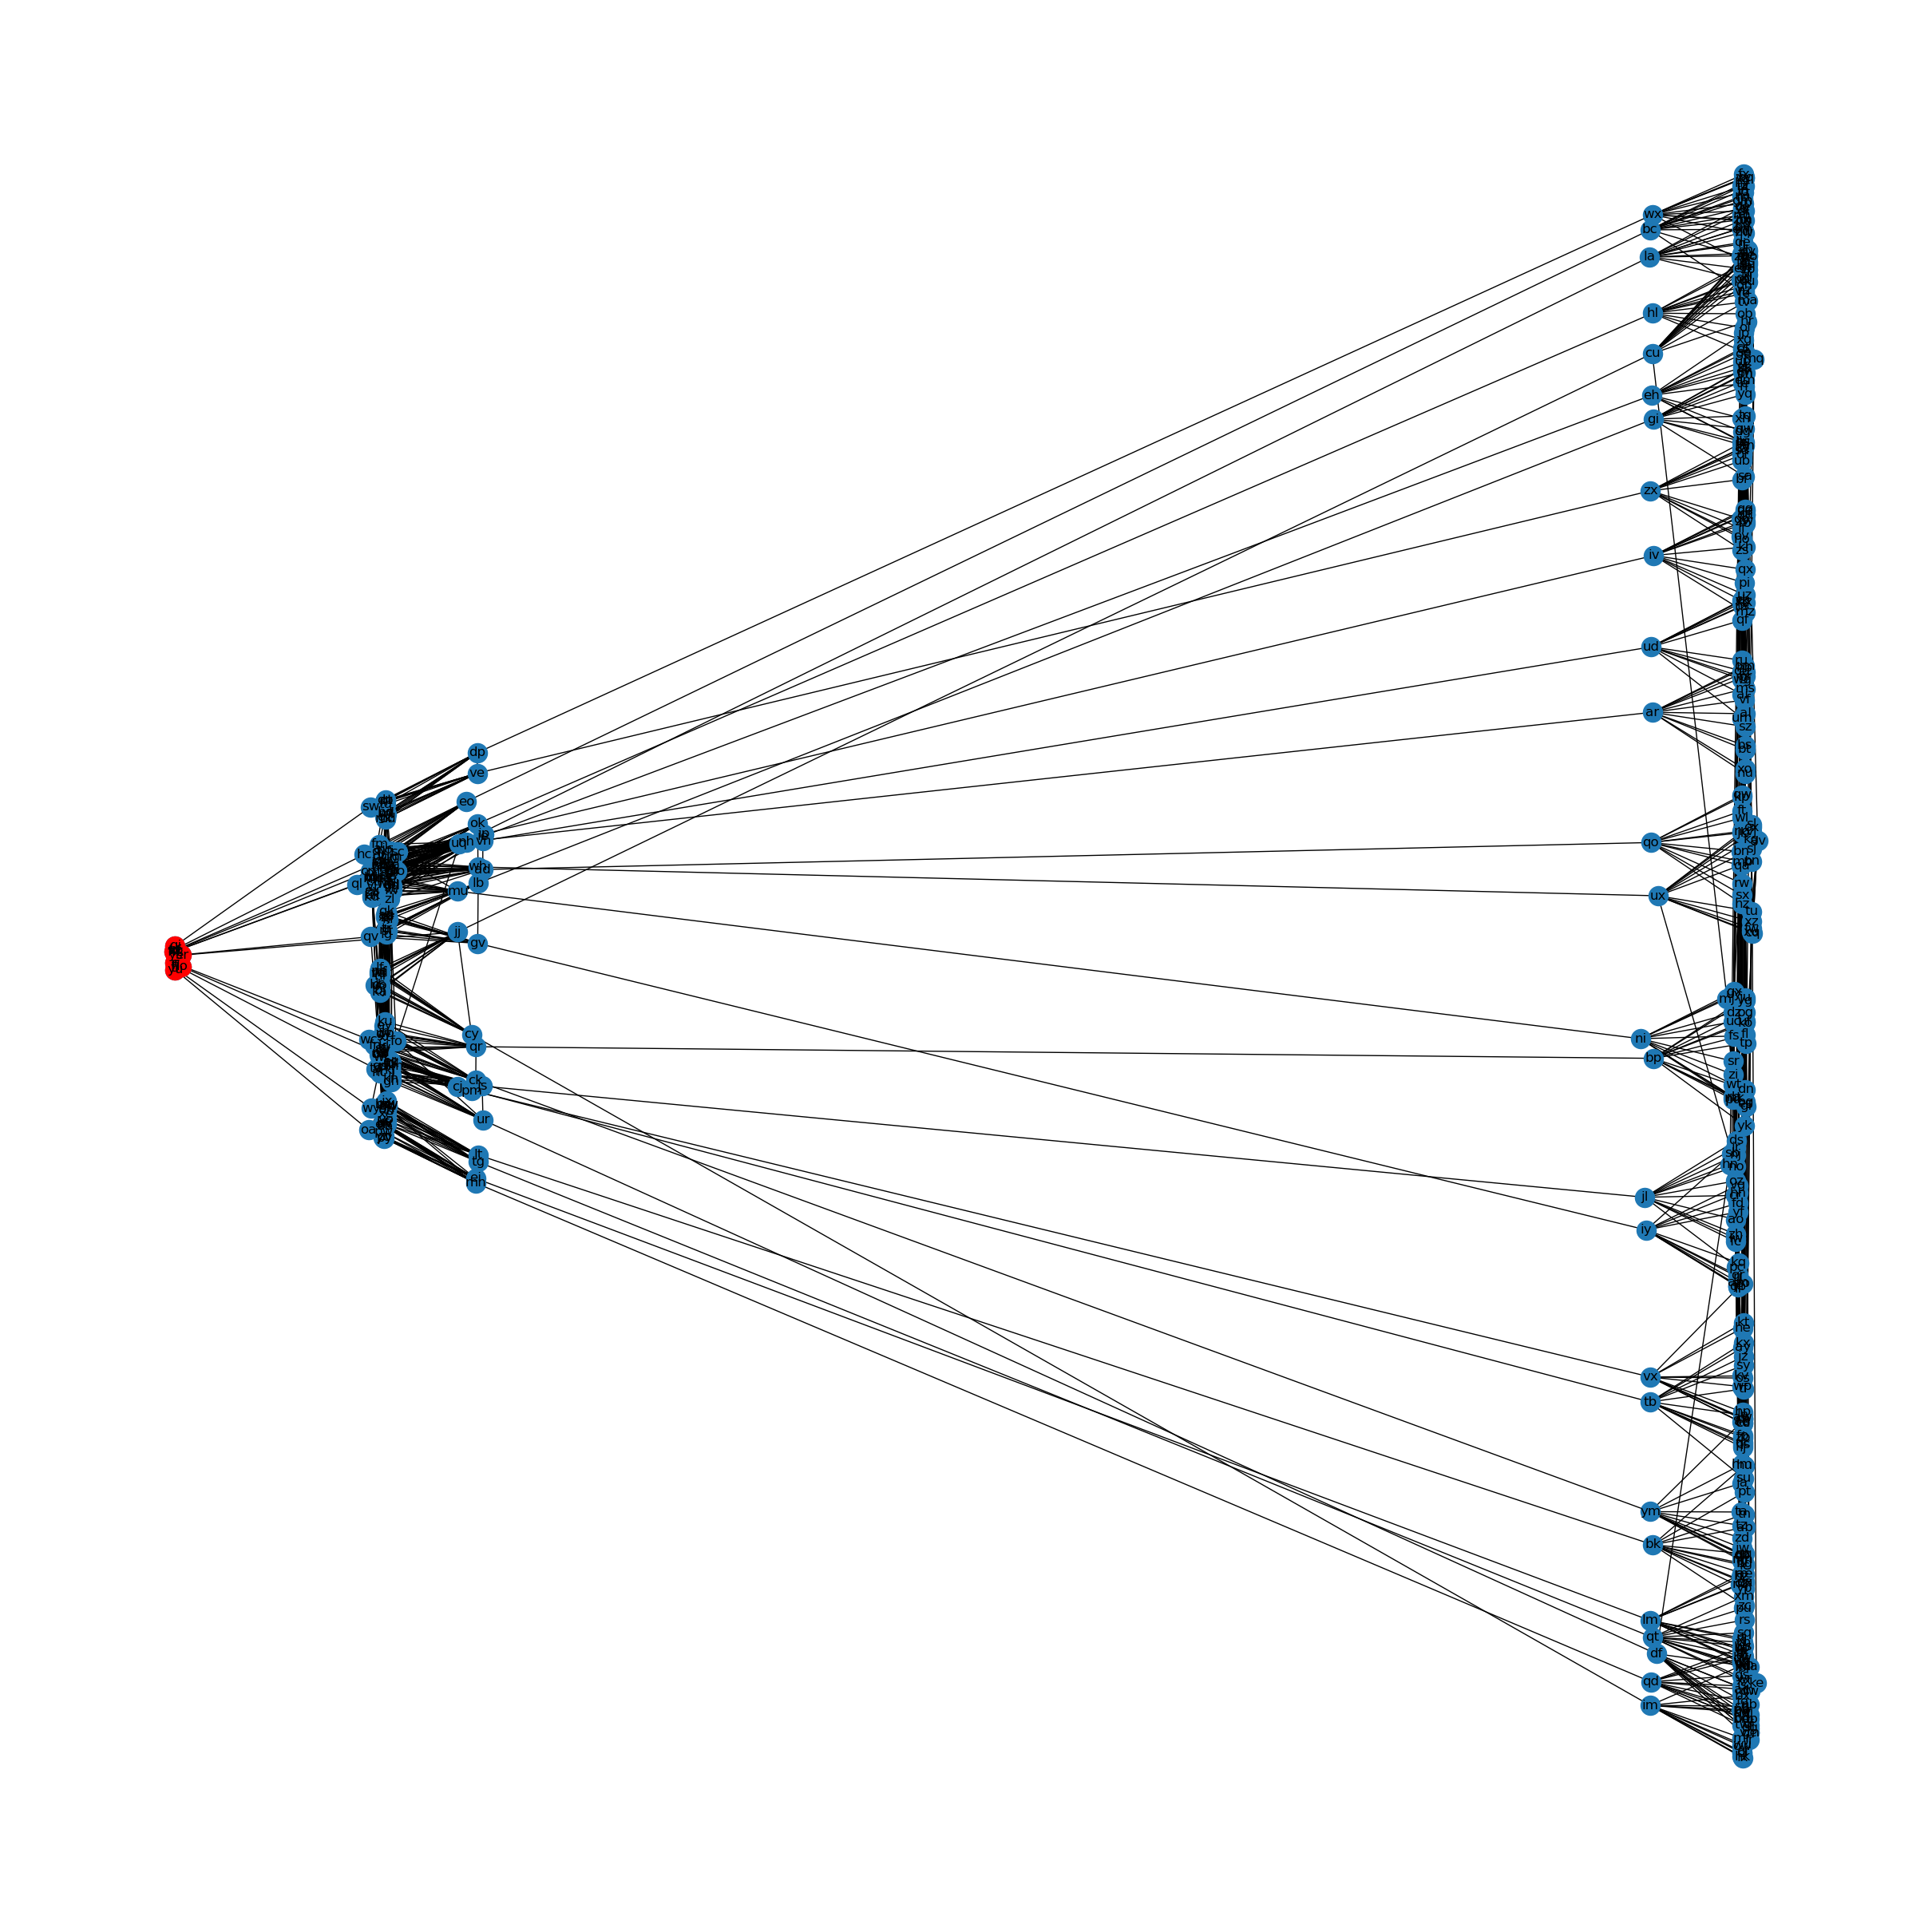

In [7]:
# plot a graph
import matplotlib.pyplot as plt
import networkx as nx

# set figure size
plt.figure(figsize=(24, 24))

G = nx.Graph()
G.add_edges_from(pairs)
pos = nx.spectral_layout(G, scale=0.1, dim=2)
nx.draw(G, pos, with_labels=True)

# highlight the largest clique
nx.draw_networkx_nodes(G, pos, nodelist=largest_clique, node_color='r')

plt.show()


In [8]:
# part 2 solution 2 (trying to recall long forgotten methods)

maximal_cliques = []
def bron_kerbosch_pivot(r, p, x, graph):
    if not p and not x:
        maximal_cliques.append(r)
        return
    try:
        pivot = max((len(set(graph[v]) & p) for v in (p | x)), default=0)
        pivot_vertex = next(v for v in (p | x) if len(set(graph[v]) & p) == pivot)
    except ValueError:
        pivot_vertex = None
    
    for v in p - (set(graph[pivot_vertex]) if pivot_vertex else set()):
        neighbors = set(graph[v])
        bron_kerbosch_pivot(
            r | {v},
            p & neighbors,
            x & neighbors,
            graph
        )
        p = p - {v}
        x = x | {v}


In [9]:
# Convert edge_map to proper format and find maximal cliques
vertices = set(edge_map.keys())

bron_kerbosch_pivot(set(), vertices, set(), edge_map)

# Find the largest clique
largest_clique_bk = max(maximal_cliques, key=len)

print(f"Largest clique size: {len(largest_clique_bk)}")
print(f"Largest clique: {','.join(sorted(largest_clique_bk))}")


Largest clique size: 13
Largest clique: er,fh,fi,ir,kk,lo,lp,qi,ti,vb,xf,ys,yu
